#Introduction
RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of a superliner or cruise ship.The disaster drew public attention, provided foundational material for the disaster film genre, and has inspired many artistic works. The movie Titanic is one of the most famous artistic works inspired by this tragedy.





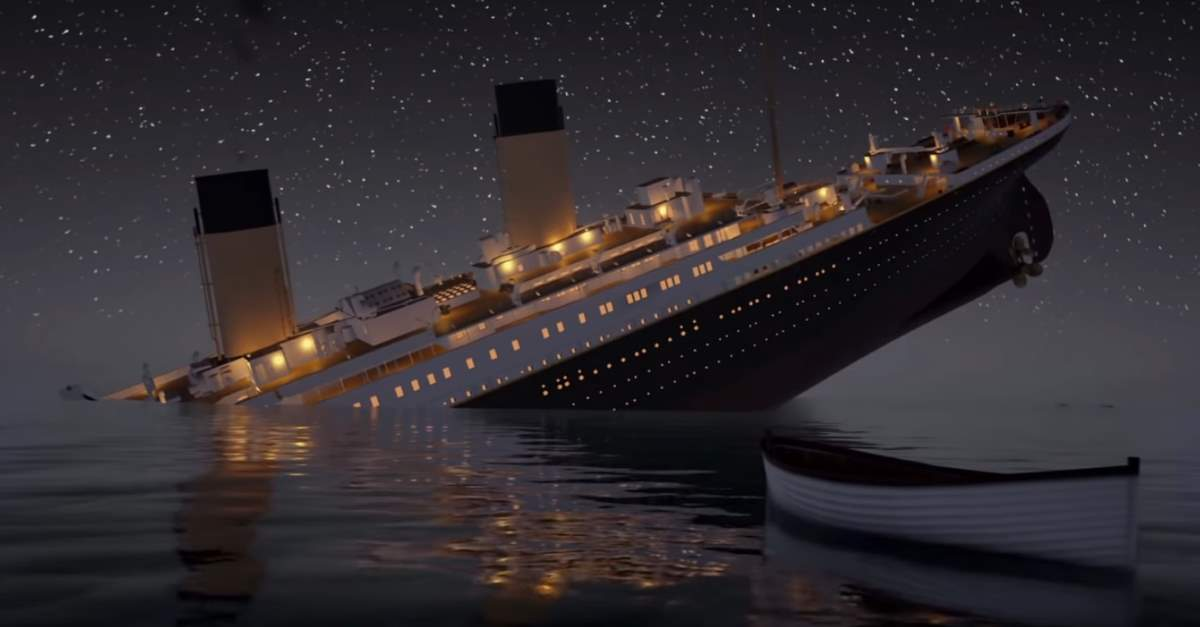

In [ ]:
from IPython.display import Image
Image('/content/Unknown.jpg')

#Dataset
We are provided with 3 files
1. gender_submission.csv - An example of what a submission file should look like. Which contains two columns PassengerId and a Survived column

2. test.csv - To check accuracy of the model

3. train.csv - Contains the training data which we will be using for our modelling experiment. It contains 12 columns.

The dataset can be found here and can be downloaded : https://www.kaggle.com/competitions/titanic/data


#Approach
1. Load the data
2. Exploratory data analysis (EDA)
3. Pre-processing data (Filling missing values etc)
4. Feature Engineering 
5. Modelling
6. Prediction


#1. Load the data

In [ ]:
#importing dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
#Reading the traing and test data
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
print("Training Dataset:")
train_df.head()

Training Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Test Dataset:")
test_df.head()

Test Dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Exploratory Data Analysis (EDA)


We have two sets of data:

train.csv - This will be used to develop the required features for our modelling experiments. This contains the outcome or the data pertaining to survival of each passenger (ground truth labels) 

test.csv - This is used to evaluate the accuracy of our model and see how our data performs when exposed to unseen data. 

#Exploring the training dataframe

In [ ]:
# list(data) or
list(train_df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that we have a total of 12 columns, let us iterate over each column and analyse them to understand the dataset better!

1. PassengerId (Integer) : Contains the serialized ordered numbers that provide a unique id to each passenger

2. Survived (Boolean) : It provided information whether a passenger survived or not using boolean variables. 0 = Not survived, 1 = Survived

3. Pclass (Integer): It is the ticket class the passenger belongs too.
1= 1st class, 2 = 2nd class, 3 = 3rd class

4. Name(String) : The name of the passenger

5. Sex(String): Provides the gender of a passenger. Male or Female

6. Age(Integer): Provides the age of the passenger

7. Sibsp(Integers): Gives us information on the number of siblings or spouses boarding the ship.

8. parch(Integer): Gives us information on the number of parents or children boarding the ship

9. Ticket(Integer): Gives us the ticket number for the passenger

10. Fare(Integer): The fare for the ticket for a passenger

11. Cabin(String): The cabin number of the passenger in the ship

12. Embarked(String): Information on the port in which they embarked the titanic C = Cherbourg, Q = Queenstown, S = Southampton




From the column description we can see that we can classify the data into **categorical and numerical data**:

**Categorical:** Survived, Sex, Embarked, Pclass (ordinal)

**Numerical:** Age (Continous), Fare(Continous), Sibsp(Discrete), Parch(Discrete)



#Identifying any missing data

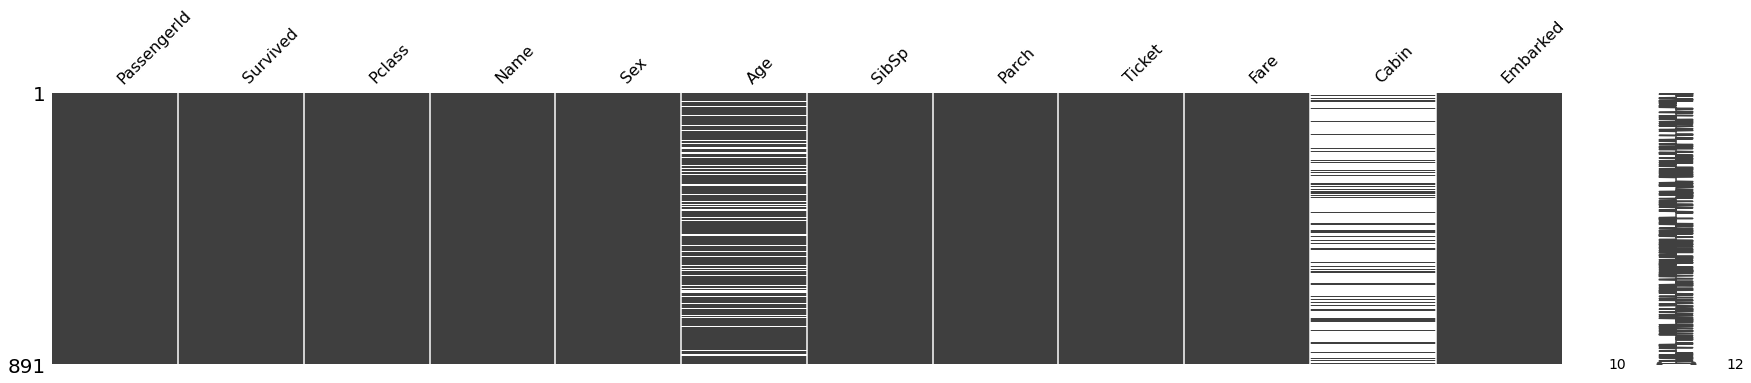

In [ ]:
#Plot graphic of missing
import missingno
missingno.matrix(train_df, figsize = (30,5))

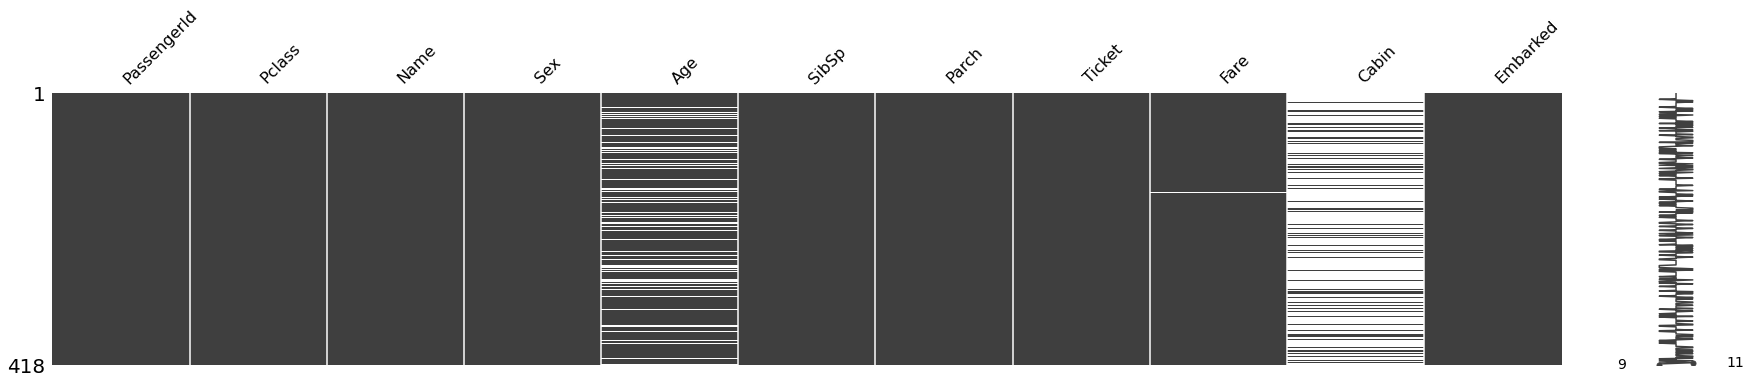

In [ ]:
#Plot graphic of missing
import missingno
missingno.matrix(test_df, figsize = (30,5))

In [ ]:
#finding number of missing values 
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#finding number of missing values 
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

#Writing a helper function to see the missing the missing data in the train and test data

In [ ]:
print("Training data")
missingdata(train_df)

Training data


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [ ]:
print("Test data")
missingdata(test_df)

Test data


,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


We can see from from our analysis that the 3 columns Cabin, Age and Fare have missing value and we need to handle this in our pre-processing

#Data Pre-processing

#Imputatation

**Imputation** refers to the technique of dealing with **missing data points**. In this section lets identyfing if and where there is missing data


In [ ]:
test_df['Age'].mean()

30.272590361445783

In [ ]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

Both the test and train Age features contains more the 15% of missing Data so we are fill with the median

In [ ]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

Cabin Featueres has more than 75% of missing data in both Test and train data so we are remove the Cabin

In [ ]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

In [ ]:
print('check the nan value in train data')
print(train_df.isnull().sum())
print('___'*30)
print('check the nan value in test data')
print(test_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
__________________________________________________________________________________________
check the nan value in test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#Feature Engineering
Feature engineering or feature extraction or feature discovery is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data.[1] The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

#Some of the common feature Engineering Techniques
List of Techniques
1. Imputation
2. Handling Outliers
3. Binning
4. Log Transform
5. One-Hot Encoding
6. Grouping Operations
7. Feature Split
8. Scaling
9. Extracting Date

In [ ]:
## combine test and train as single to apply some function
all_data=[train_df,test_df]

In [ ]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [ ]:
## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [ ]:
## create bin for fare features
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [ ]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_df
testdf=test_df

In [ ]:
all_dat=[traindf,testdf]

In [ ]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [ ]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [ ]:
testdf.head(2)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,892,3,male,0,0,Q,1,Mr,Adult,Low_fare
1,893,3,female,1,0,S,2,Mrs,Elder,Low_fare


In [ ]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [ ]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [ ]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


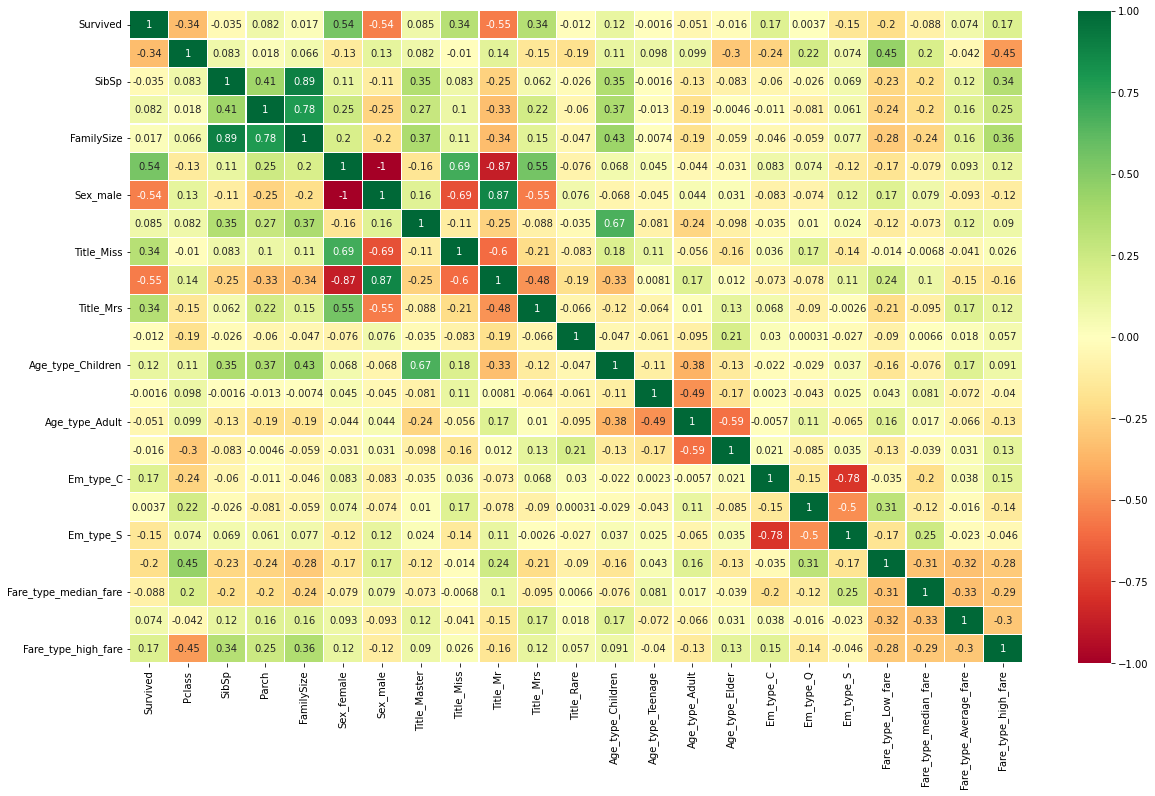

In [ ]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Interpreting The Heatmap The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

#Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us

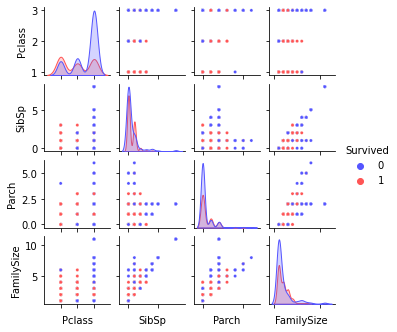

In [ ]:
g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [ ]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

#Model

Now we are ready to train a model and predict the required solution. There are lot of predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression

KNN

Support Vector Machines

Naive Bayes classifier

Decision Tree

Random Forrest

Linear Discriminant Analysis

Ada Boost Classifier

Gradient Boosting Classifier

And also compared above given classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure and plot accuracy based confusion matrix

#Logistic Regression

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 82.46
The cross validated score for Logistic REgression is: 81.93


Text(0.5, 1.05, 'Confusion_matrix')

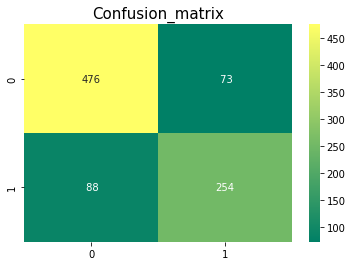

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10,shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Random Forest

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 82.46
The cross validated score for Random Forest Classifier is: 83.73


Text(0.5, 1.05, 'Confusion_matrix')

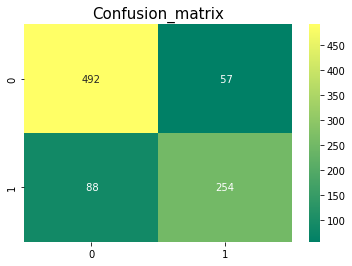

In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Support Vector Machine

--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 83.58
The cross validated score for Support Vector Machines Classifier is: 83.16


Text(0.5, 1.05, 'Confusion_matrix')

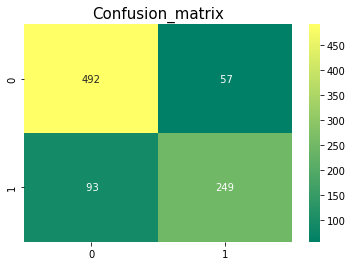

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#KNN

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 79.48
The cross validated score for K Nearest Neighbors Classifier is: 80.02


Text(0.5, 1.05, 'Confusion_matrix')

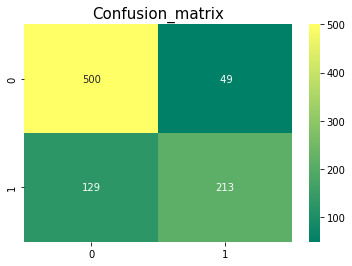

In [ ]:
##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Gaussian Naive Bayes

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 79.48
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

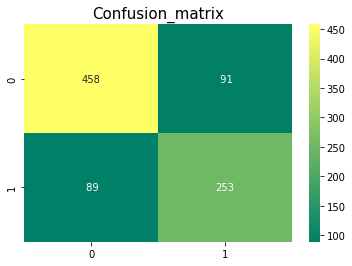

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Decision Tree

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 80.6
The cross validated score for Decision Tree classifier is: 80.36


Text(0.5, 1.05, 'Confusion_matrix')

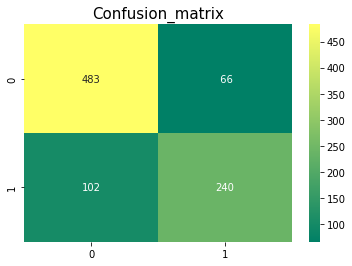

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Gradient Boost

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 82.46
The cross validated score for AdaBoostClassifier is: 82.05


Text(0.5, 1.05, 'Confusion_matrix')

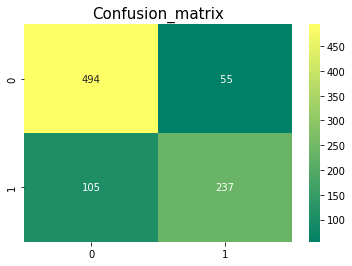

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Ada Boost


--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 80.22
The cross validated score for AdaBoostClassifier is: 81.03


Text(0.5, 1.05, 'Confusion_matrix')

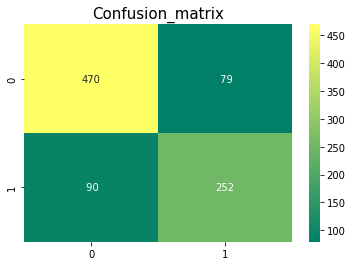

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Linear Discriminant Analysis

--------------The Accuracy of the model----------------------------
The accuracy of the LinearDiscriminantAnalysis is 82.84
The cross validated score for AdaBoostClassifier is: 82.38


Text(0.5, 1.05, 'Confusion_matrix')

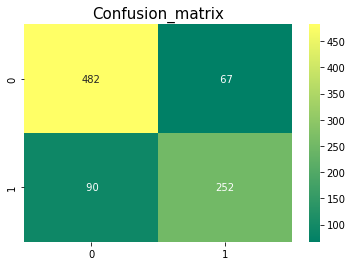

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the LinearDiscriminantAnalysis is',round(accuracy_score(prediction_lda,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True,random_state = 22) # k=10, split the data into 10 equal parts
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.837303
0,Support Vector Machines,0.831648
7,Linear Discriminant Analysis,0.823820
6,Gradient Decent,0.820474
2,Logistic Regression,0.819301
5,AdaBoostClassifier,0.810325
8,Decision Tree,0.803633
1,KNN,0.800225
4,Naive Bayes,0.798002


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 22), (891,), (418, 22))

In [ ]:
# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204632477559475


RandomForestClassifier(n_estimators=700)

In [ ]:
# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8227041616973197


RandomForestClassifier(n_estimators=900)

Important features
____________________________________________________________
89.11


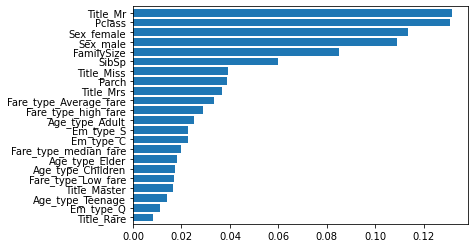

In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
submission.to_csv('submission.csv', index=False)